In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline 

gj_data = pd.read_csv('도로교통공단_광주광역시 개별사고정보_15~19.csv', sep=',', encoding='cp949')
gj_data

,발생일,발생시간,발생요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,...,도로형태_대분류,도로형태,가해자차종,가해자성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
0,2015-01-30,0,금,광산구,경상,0,0,1,0,차량단독,...,단일로,고가도로위,승용차,남,44세,상해없음,없음,없음,불명,없음
1,2015-03-28,22,토,북구,경상,0,0,2,0,차대차,...,단일로,기타단일로,승용차,여,28세,상해없음,승용차,남,28세,경상
2,2015-08-03,5,월,북구,경상,0,0,2,0,차대차,...,단일로,기타단일로,승용차,남,46세,경상,승합차,남,54세,경상
3,2015-09-07,20,월,광산구,경상,0,0,1,0,차대차,...,단일로,기타단일로,승용차,여,54세,경상,화물차,남,33세,상해없음
4,2015-10-03,13,토,광산구,경상,0,0,2,0,차대차,...,단일로,터널안,승용차,남,52세,상해없음,승용차,남,35세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38340,2019-04-29,3,월,북구,경상,0,0,1,0,차대차,...,단일로,기타단일로,승용차,남,27세,상해없음,승용차,남,56세,경상
38341,2019-04-30,13,화,북구,경상,0,0,1,0,차대차,...,교차로,교차로부근,승합차,남,45세,상해없음,승합차,남,49세,상해없음
38342,2019-05-02,8,목,북구,경상,0,0,1,0,차대사람,...,단일로,기타단일로,불명,기타불명,불명,기타불명,보행자,여,11세,경상
38343,2019-05-03,8,금,북구,경상,0,0,1,0,차대사람,...,기타,기타,불명,기타불명,불명,기타불명,보행자,남,76세,경상


In [117]:
# 광주광역시 교통사고데이터에는 '법정동명' 칼럼이 없어요ㅠㅠㅠㅠ 여러분..... 법정동명 변수는 빼고 해야될 것 같습니다 흑흑...

gj_data.columns

Index(['발생일', '발생시간', '발생요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태', '기상상태',
       '도로형태_대분류', '도로형태', '가해자차종', '가해자성별', '가해자연령', '가해자신체상해정도', '피해자차종',
       '피해자성별', '피해자연령', '피해자신체상해정도'],
      dtype='object')

In [118]:
gj_data.rename(columns={'시군구': '발생지_시군구', '발생요일':'요일','가해자성별': '가해성별', }, inplace=True)

In [119]:
gj_data.head()

,발생일,발생시간,요일,발생지_시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,...,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
0,2015-01-30,0,금,광산구,경상,0,0,1,0,차량단독,...,단일로,고가도로위,승용차,남,44세,상해없음,없음,없음,불명,없음
1,2015-03-28,22,토,북구,경상,0,0,2,0,차대차,...,단일로,기타단일로,승용차,여,28세,상해없음,승용차,남,28세,경상
2,2015-08-03,5,월,북구,경상,0,0,2,0,차대차,...,단일로,기타단일로,승용차,남,46세,경상,승합차,남,54세,경상
3,2015-09-07,20,월,광산구,경상,0,0,1,0,차대차,...,단일로,기타단일로,승용차,여,54세,경상,화물차,남,33세,상해없음
4,2015-10-03,13,토,광산구,경상,0,0,2,0,차대차,...,단일로,터널안,승용차,남,52세,상해없음,승용차,남,35세,경상


In [121]:
# 발생시간을 00:00꼴의 형태로 변환하기 위해서, 계속 고민하고 있었는데, 천사같은 민정님 덕분에 쉽게 해결하였습니다. 넘넘 고마워용^^
# (발생일_시간, 발생일_시간_시군구 칼럼에 추가해야 하잖아요!)
gj_data['발생시간'] = [f"{i:#02d}:00" for i in list(gj_data['발생시간'])]

In [122]:
gj_data.head()

,발생일,발생시간,요일,발생지_시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,...,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
0,2015-01-30,00:00,금,광산구,경상,0,0,1,0,차량단독,...,단일로,고가도로위,승용차,남,44세,상해없음,없음,없음,불명,없음
1,2015-03-28,22:00,토,북구,경상,0,0,2,0,차대차,...,단일로,기타단일로,승용차,여,28세,상해없음,승용차,남,28세,경상
2,2015-08-03,05:00,월,북구,경상,0,0,2,0,차대차,...,단일로,기타단일로,승용차,남,46세,경상,승합차,남,54세,경상
3,2015-09-07,20:00,월,광산구,경상,0,0,1,0,차대차,...,단일로,기타단일로,승용차,여,54세,경상,화물차,남,33세,상해없음
4,2015-10-03,13:00,토,광산구,경상,0,0,2,0,차대차,...,단일로,터널안,승용차,남,52세,상해없음,승용차,남,35세,경상


In [123]:
gj_data['발생일']=[str(i) for i in gj_data['발생일']]
gj_data['발생일_시간'] = gj_data['발생일']+" "+ gj_data['발생시간'].astype(str)
gj_data['발생일_시간_시군구'] = gj_data['발생일']+" "+gj_data['발생시간'].astype(str)+" "+gj_data['발생지_시군구']
gj_data['사고건수'] = [1 for i in gj_data['발생일']]
gj_data['발생일'] = pd.to_datetime(gj_data['발생일'], format='%Y-%m-%d')
gj_data['발생년도'] = gj_data['발생일'].dt.year
gj_data['발생월'] = gj_data['발생일'].dt.month
gj_data['발생일자'] = gj_data['발생일'].dt.day
gj_data['부상자수'] = gj_data['사망자수']+gj_data['중상자수']+gj_data['경상자수']+gj_data['부상신고자수']

gj_data.head()

,발생일,발생시간,요일,발생지_시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,...,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,부상자수
0,2015-01-30,00:00,금,광산구,경상,0,0,1,0,차량단독,...,없음,불명,없음,2015-01-30 00:00,2015-01-30 00:00 광산구,1,2015,1,30,1
1,2015-03-28,22:00,토,북구,경상,0,0,2,0,차대차,...,남,28세,경상,2015-03-28 22:00,2015-03-28 22:00 북구,1,2015,3,28,2
2,2015-08-03,05:00,월,북구,경상,0,0,2,0,차대차,...,남,54세,경상,2015-08-03 05:00,2015-08-03 05:00 북구,1,2015,8,3,2
3,2015-09-07,20:00,월,광산구,경상,0,0,1,0,차대차,...,남,33세,상해없음,2015-09-07 20:00,2015-09-07 20:00 광산구,1,2015,9,7,1
4,2015-10-03,13:00,토,광산구,경상,0,0,2,0,차대차,...,남,35세,경상,2015-10-03 13:00,2015-10-03 13:00 광산구,1,2015,10,3,2


In [124]:
new_data1 = gj_data.groupby(['발생일_시간', '요일', '발생년도','발생월','발생일자']).sum()[['사망자수', '중상자수', '부상신고자수', '사고건수', '부상자수', '경상자수']]
new_data1 = new_data1.reset_index(drop=False) 
new_data1 = new_data1.reindex(columns = ['발생일_시간','사고건수', '발생년도', '발생월', '발생일자', '요일','부상자수','사망자수', '중상자수', '경상자수','부상신고자수'])
new_data1

,발생일_시간,사고건수,발생년도,발생월,발생일자,요일,부상자수,사망자수,중상자수,경상자수,부상신고자수
0,2015-01-01 00:00,3,2015,1,1,목,4,0,0,4,0
1,2015-01-01 01:00,1,2015,1,1,목,1,0,0,1,0
2,2015-01-01 02:00,3,2015,1,1,목,4,0,0,3,1
3,2015-01-01 03:00,5,2015,1,1,목,7,0,1,6,0
4,2015-01-01 04:00,4,2015,1,1,목,8,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...
23926,2019-12-31 18:00,2,2019,12,31,화,2,0,0,2,0
23927,2019-12-31 19:00,1,2019,12,31,화,2,0,0,2,0
23928,2019-12-31 20:00,2,2019,12,31,화,3,0,0,3,0
23929,2019-12-31 21:00,1,2019,12,31,화,1,0,0,1,0


In [125]:
  from sklearn.model_selection import KFold
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.linear_model import LinearRegression
  import matplotlib.pyplot as plt
  import numpy as np

  def data_split(data, feature_names):

    X_train = data[(data['발생년도']<2019)][feature_names]
    X_test = data[(data['발생년도']==2019)][feature_names]
    y_train = data[(data['발생년도']<2019)]['사고건수']
    y_test = data[(data['발생년도']==2019)]['사고건수']
    y_test= y_test.reset_index(drop=True)

    return X_train, X_test, y_train, y_test


  def forest_fit():

    forest = RandomForestRegressor(n_estimators=100, 
                                criterion='mse', 
                                random_state=1, 
                                n_jobs=-1)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(y_test_pred[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

    scores = cross_val_score(estimator=forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


  def LR_fit():

    LR = LinearRegression()

    LR.fit(X_train, y_train)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(y_test_pred[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

    scores = cross_val_score(estimator=LR,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))    

  
  def LR_log_fit():
    LR = LinearRegression()

    y_train_log = np.log1p(y_train)
    y_test_log = np.log1p(y_test)
    LR.fit(X_train, y_train_log)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)
    

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(np.exp(y_train_log),np.exp(y_train_pred)),
      mean_squared_error(np.exp(y_test_log),np.exp(y_test_pred))))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(np.exp(y_train_log),np.exp(y_train_pred)),
          r2_score(np.exp(y_test_log),np.exp(y_test_pred))))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(np.exp(y_test_pred)[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    
    scores = cross_val_score(estimator=LR,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


In [126]:
def forest_top5(data, fnames, k):

  from sklearn.ensemble import RandomForestRegressor
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  import numpy as np

  y_train = data[(data['발생년도']<2019)]['사고건수']
  y_test = data[(data['발생년도']==2019)]['사고건수']
  y_test= y_test.reset_index(drop=True)

  from itertools import combinations as cm

  scores=[]


  fsets=list(cm(fnames,k)) #변수명에 대해 nCk의 조합

  for cmb in fsets: #각 조합에 대해
    fset=[]
    for x in cmb:
      if type(x)==str:
        fset.append(x)
      else:
        fset=fset+x

    X_train = data[(data['발생년도']<2019)][fset] #train, test셋 만들고
    X_test = data[(data['발생년도']==2019)][fset]

    forest = RandomForestRegressor(n_estimators=100, #모델 적합
                                criterion='squared_error', 
                                random_state=1, 
                                n_jobs=-1)
    forest.fit(X_train, y_train)           #적합

    y_train_pred = forest.predict(X_train) #예측
    y_test_pred = forest.predict(X_test)
 
    print('\n 랜덤포레스트 변수: ', fset)  #해당 모델에 사용된 변수 조합

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))
    
    scores.append( (round(r2_score(y_test, y_test_pred),3),fset) ) #for문 안에서 튜플 추가

  print(sorted(scores, key=lambda x: x[1], reverse=True)[:5]) #성적순 정렬해 상위 점수 5개 조합 반환

In [127]:
#연령 데이터 전처리 (불명은 0세 처리, 정수형으로 변환하기 위해서 뒤에 '세'라는 글자 빼는 작업을 하겠습니다.)
def age_to_num(df):
    for c, i in enumerate(df):
        if i in ['불명','없음']:
            df[c] = '0세'
    df = [int(i[:-1]) for i in df]
    return df

In [128]:
gj_data

,발생일,발생시간,요일,발생지_시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,...,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,부상자수
0,2015-01-30,00:00,금,광산구,경상,0,0,1,0,차량단독,...,없음,불명,없음,2015-01-30 00:00,2015-01-30 00:00 광산구,1,2015,1,30,1
1,2015-03-28,22:00,토,북구,경상,0,0,2,0,차대차,...,남,28세,경상,2015-03-28 22:00,2015-03-28 22:00 북구,1,2015,3,28,2
2,2015-08-03,05:00,월,북구,경상,0,0,2,0,차대차,...,남,54세,경상,2015-08-03 05:00,2015-08-03 05:00 북구,1,2015,8,3,2
3,2015-09-07,20:00,월,광산구,경상,0,0,1,0,차대차,...,남,33세,상해없음,2015-09-07 20:00,2015-09-07 20:00 광산구,1,2015,9,7,1
4,2015-10-03,13:00,토,광산구,경상,0,0,2,0,차대차,...,남,35세,경상,2015-10-03 13:00,2015-10-03 13:00 광산구,1,2015,10,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38340,2019-04-29,03:00,월,북구,경상,0,0,1,0,차대차,...,남,56세,경상,2019-04-29 03:00,2019-04-29 03:00 북구,1,2019,4,29,1
38341,2019-04-30,13:00,화,북구,경상,0,0,1,0,차대차,...,남,49세,상해없음,2019-04-30 13:00,2019-04-30 13:00 북구,1,2019,4,30,1
38342,2019-05-02,08:00,목,북구,경상,0,0,1,0,차대사람,...,여,11세,경상,2019-05-02 08:00,2019-05-02 08:00 북구,1,2019,5,2,1
38343,2019-05-03,08:00,금,북구,경상,0,0,1,0,차대사람,...,남,76세,경상,2019-05-03 08:00,2019-05-03 08:00 북구,1,2019,5,3,1


In [129]:
gj_data['가해자연령'] = age_to_num(gj_data['가해자연령']) 
gj_data['피해자연령'] = age_to_num(gj_data['피해자연령'])

<ipython-input-127-06e099a23670>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = '0세'


In [130]:
#시간 데이터 전처리 (뒤에 :00이라는 글자를 빼고, 정수형으로 변환시키는 작업을 해주겠습니다.)
gj_data['발생시간'] = [int(i[:-3]) for i in gj_data['발생시간']]

In [131]:
gj_data.head()

,발생일,발생시간,요일,발생지_시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,...,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,부상자수
0,2015-01-30,0,금,광산구,경상,0,0,1,0,차량단독,...,없음,0,없음,2015-01-30 00:00,2015-01-30 00:00 광산구,1,2015,1,30,1
1,2015-03-28,22,토,북구,경상,0,0,2,0,차대차,...,남,28,경상,2015-03-28 22:00,2015-03-28 22:00 북구,1,2015,3,28,2
2,2015-08-03,5,월,북구,경상,0,0,2,0,차대차,...,남,54,경상,2015-08-03 05:00,2015-08-03 05:00 북구,1,2015,8,3,2
3,2015-09-07,20,월,광산구,경상,0,0,1,0,차대차,...,남,33,상해없음,2015-09-07 20:00,2015-09-07 20:00 광산구,1,2015,9,7,1
4,2015-10-03,13,토,광산구,경상,0,0,2,0,차대차,...,남,35,경상,2015-10-03 13:00,2015-10-03 13:00 광산구,1,2015,10,3,2


In [132]:
# 결측치가 없는 것을 확인하실 수 있을겁니다~!!! 야호!! 소리질러~~~
gj_data.isna().sum()

발생일           0
발생시간          0
요일            0
발생지_시군구       0
사고내용          0
사망자수          0
중상자수          0
경상자수          0
부상신고자수        0
사고유형_대분류      0
사고유형_중분류      0
사고유형          0
가해자법규위반       0
노면상태_대분류      0
노면상태          0
기상상태          0
도로형태_대분류      0
도로형태          0
가해자차종         0
가해성별          0
가해자연령         0
가해자신체상해정도     0
피해자차종         0
피해자성별         0
피해자연령         0
피해자신체상해정도     0
발생일_시간        0
발생일_시간_시군구    0
사고건수          0
발생년도          0
발생월           0
발생일자          0
부상자수          0
dtype: int64

In [133]:
# 
gj_data.dtypes

발생일           datetime64[ns]
발생시간                   int64
요일                    object
발생지_시군구               object
사고내용                  object
사망자수                   int64
중상자수                   int64
경상자수                   int64
부상신고자수                 int64
사고유형_대분류              object
사고유형_중분류              object
사고유형                  object
가해자법규위반               object
노면상태_대분류              object
노면상태                  object
기상상태                  object
도로형태_대분류              object
도로형태                  object
가해자차종                 object
가해성별                  object
가해자연령                  int64
가해자신체상해정도             object
피해자차종                 object
피해자성별                 object
피해자연령                  int64
피해자신체상해정도             object
발생일_시간                object
발생일_시간_시군구            object
사고건수                   int64
발생년도                   int64
발생월                    int64
발생일자                   int64
부상자수                   int64
dtype: object

In [134]:
new_data2 = gj_data.copy()

In [135]:
# 정수형 데이터로 변환하는 작업을 해드리겠습니다~!~!~!~

for i in ['요일', '발생지_시군구', '사고내용', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태', '기상상태', '도로형태_대분류', '도로형태', '가해자차종', '가해성별', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자신체상해정도']:
  mapping = {label: idx for idx, label in enumerate(np.unique(gj_data[i]))}
  print(mapping)
  new_data2[i] = gj_data[i].map(mapping)

{'금': 0, '목': 1, '수': 2, '월': 3, '일': 4, '토': 5, '화': 6}
{'광산구': 0, '남구': 1, '동구': 2, '북구': 3, '서구': 4}
{'경상': 0, '부상신고': 1, '사망': 2, '중상': 3}
{'차대사람': 0, '차대차': 1, '차량단독': 2}
{'공작물충돌': 0, '기타': 1, '길가장자리구역통행중': 2, '도로이탈': 3, '보도통행중': 4, '전도': 5, '전도전복': 6, '전복': 7, '정면충돌': 8, '주/정차차량 충돌': 9, '차도통행중': 10, '추돌': 11, '측면충돌': 12, '횡단중': 13, '후진중충돌': 14}
{'공작물충돌': 0, '기타': 1, '길가장자리구역통행중': 2, '도로이탈 기타': 3, '도로이탈 추락': 4, '보도통행중': 5, '전도': 6, '전도전복': 7, '전복': 8, '정면충돌': 9, '주/정차차량 충돌': 10, '주정차중 추돌': 11, '진행중 추돌': 12, '차도통행중': 13, '추돌': 14, '측면충돌': 15, '횡단중': 16, '후진중충돌': 17}
{'과속': 0, '교차로 통행방법 위반': 1, '기타': 2, '보행자 보호의무 위반': 3, '신호위반': 4, '안전거리 미확보': 5, '안전운전 의무 불이행': 6, '중앙선 침범': 7}
{'비포장': 0, '포장': 1}
{'건조': 0, '기타': 1, '서리/결빙': 2, '적설': 3, '젖음/습기': 4, '침수': 5, '해빙': 6}
{'기타/불명': 0, '눈': 1, '맑음': 2, '비': 3, '안개': 4, '흐림': 5}
{'교차로': 0, '기타': 1, '기타/불명': 2, '단일로': 3, '불명': 4}
{'고가도로위': 0, '교량위': 1, '교차로내': 2, '교차로부근': 3, '교차로횡단보도내': 4, '기타': 5, '기타/불명': 6, '기타단일로': 7, '불명': 8, '지하차도(도로)내'

In [136]:
new_data2

,발생일,발생시간,요일,발생지_시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,...,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자,부상자수
0,2015-01-30,0,0,0,0,0,0,1,0,2,...,2,0,5,2015-01-30 00:00,2015-01-30 00:00 광산구,1,2015,1,30,1
1,2015-03-28,22,5,3,0,0,0,2,0,1,...,1,28,0,2015-03-28 22:00,2015-03-28 22:00 북구,1,2015,3,28,2
2,2015-08-03,5,3,3,0,0,0,2,0,1,...,1,54,0,2015-08-03 05:00,2015-08-03 05:00 북구,1,2015,8,3,2
3,2015-09-07,20,3,0,0,0,0,1,0,1,...,1,33,4,2015-09-07 20:00,2015-09-07 20:00 광산구,1,2015,9,7,1
4,2015-10-03,13,5,0,0,0,0,2,0,1,...,1,35,0,2015-10-03 13:00,2015-10-03 13:00 광산구,1,2015,10,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38340,2019-04-29,3,3,3,0,0,0,1,0,1,...,1,56,0,2019-04-29 03:00,2019-04-29 03:00 북구,1,2019,4,29,1
38341,2019-04-30,13,6,3,0,0,0,1,0,1,...,1,49,4,2019-04-30 13:00,2019-04-30 13:00 북구,1,2019,4,30,1
38342,2019-05-02,8,1,3,0,0,0,1,0,0,...,3,11,0,2019-05-02 08:00,2019-05-02 08:00 북구,1,2019,5,2,1
38343,2019-05-03,8,0,3,0,0,0,1,0,0,...,1,76,0,2019-05-03 08:00,2019-05-03 08:00 북구,1,2019,5,3,1


In [137]:
gj_data.groupby(['발생일_시간_시군구']).mean().head()

,발생시간,사망자수,중상자수,경상자수,부상신고자수,가해자연령,피해자연령,사고건수,발생년도,발생월,발생일자,부상자수
발생일_시간_시군구,,,,,,,,,,,,
2015-01-01 00:00 남구,0.0,0.0,0.0,1.0,0.0,41.0,40.0,1.0,2015.0,1.0,1.0,1.0
2015-01-01 00:00 북구,0.0,0.0,0.0,1.5,0.0,59.0,20.0,1.0,2015.0,1.0,1.0,1.5
2015-01-01 01:00 광산구,1.0,0.0,0.0,1.0,0.0,25.0,38.0,1.0,2015.0,1.0,1.0,1.0
2015-01-01 02:00 광산구,2.0,0.0,0.0,1.0,0.5,46.5,45.0,1.0,2015.0,1.0,1.0,1.5
2015-01-01 02:00 서구,2.0,0.0,0.0,1.0,0.0,57.0,48.0,1.0,2015.0,1.0,1.0,1.0


In [138]:
feature_names = ['발생시간','요일', '발생년도', '발생월', '발생일자', '노면상태_대분류', '노면상태', '기상상태', '도로형태', '도로형태_대분류']
#사고내용, 부상자수, 사고유형, 가해자/피해자 신상은 사고 이후에 얻을 수 있는 정보니까 빼고 해야지 맞지 않을까요
#cctv로 운전자들의 신상을 얻을 순 있긴 하지만 이 데이터는 쉽게 얻을 수 있는게 아니니까
#시간정보, 기상, 노면, 도로형태를 사용하는 것이 맞는 것 같습니당
#그리고 개인적인 생각인데 지역별 사고건수를 예측하는 모델이니까 각 구별 가로등, 유동인구, 거주인구 등 이런 데이터를 추가해야하지 않을까유
#10000000000% 개인적인 생각입니다 .. ㅎ (저도 동의하는 부분입니다!!)

# 평균데이터

In [139]:
mean_data = new_data2.groupby(['발생지_시군구','발생년도']).mean()
mean_data['사고건수'] = new_data2.groupby(['발생지_시군구','발생년도'])['사고건수'].sum() #사고건수만 sum
mean_data = mean_data.reset_index(drop=False)
mean_data

,발생지_시군구,발생년도,발생시간,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,...,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수,발생월,발생일자,부상자수
0,0,2015,13.829500,2.868500,0.578500,0.013500,0.194500,1.394000,0.050000,0.879500,...,42.528500,3.177000,7.658000,1.572000,39.273000,1.379500,2000,6.616000,15.675500,1.652000
1,0,2016,13.953548,2.883104,0.651863,0.015824,0.229709,1.359877,0.055641,0.866258,...,42.333333,3.173047,7.601838,1.564574,39.160286,1.496172,1959,6.650842,15.902501,1.661052
2,0,2017,13.682167,2.839550,0.654062,0.017374,0.228411,1.311702,0.037302,0.855391,...,42.449668,3.285130,7.615738,1.571794,40.026571,1.444047,1957,6.622892,16.176290,1.594788
3,0,2018,13.960204,2.838265,0.633163,0.013265,0.223980,1.376531,0.041837,0.883673,...,44.358163,3.227041,7.628061,1.602551,40.971429,1.395918,1960,6.766327,15.843878,1.655612
4,0,2019,13.910756,2.837482,0.551902,0.007046,0.184124,1.396430,0.077971,0.891029,...,44.004697,3.141381,7.561766,1.583372,40.604509,1.294974,2129,6.787224,15.748239,1.665571
5,1,2015,13.840564,2.895879,0.642082,0.010846,0.206074,1.258134,0.081345,0.777657,...,44.277657,3.315618,7.035792,1.678959,41.691974,1.454447,922,6.644252,15.919740,1.556399
6,1,2016,13.841270,2.897436,0.664225,0.012210,0.208791,1.251526,0.063492,0.738706,...,46.061050,3.236874,6.991453,1.598291,42.859585,1.517705,819,6.658120,15.661783,1.536020
7,1,2017,14.060644,2.956683,0.716584,0.018564,0.243812,1.271040,0.066832,0.757426,...,46.988861,3.366337,7.076733,1.678218,43.511139,1.538366,808,6.668317,16.205446,1.600248
8,1,2018,13.615085,2.920676,0.734720,0.014304,0.240572,1.228869,0.057217,0.778934,...,47.158648,3.488947,7.104031,1.717815,44.378414,1.587776,769,6.631990,15.942783,1.540962
9,1,2019,13.783333,2.866667,0.565556,0.006667,0.181111,1.290000,0.051111,0.810000,...,48.342222,3.454444,7.193333,1.686667,45.138889,1.326667,900,6.784444,16.088889,1.528889


In [140]:
mean_data.to_csv('광주광역시 교통사고 건수 평균 데이터(15~19).csv', encoding='utf-8-sig')

훈련 MSE: 52732.250, 테스트 MSE: 277092.025
훈련 R^2: 0.886, 테스트 R^2: 0.487


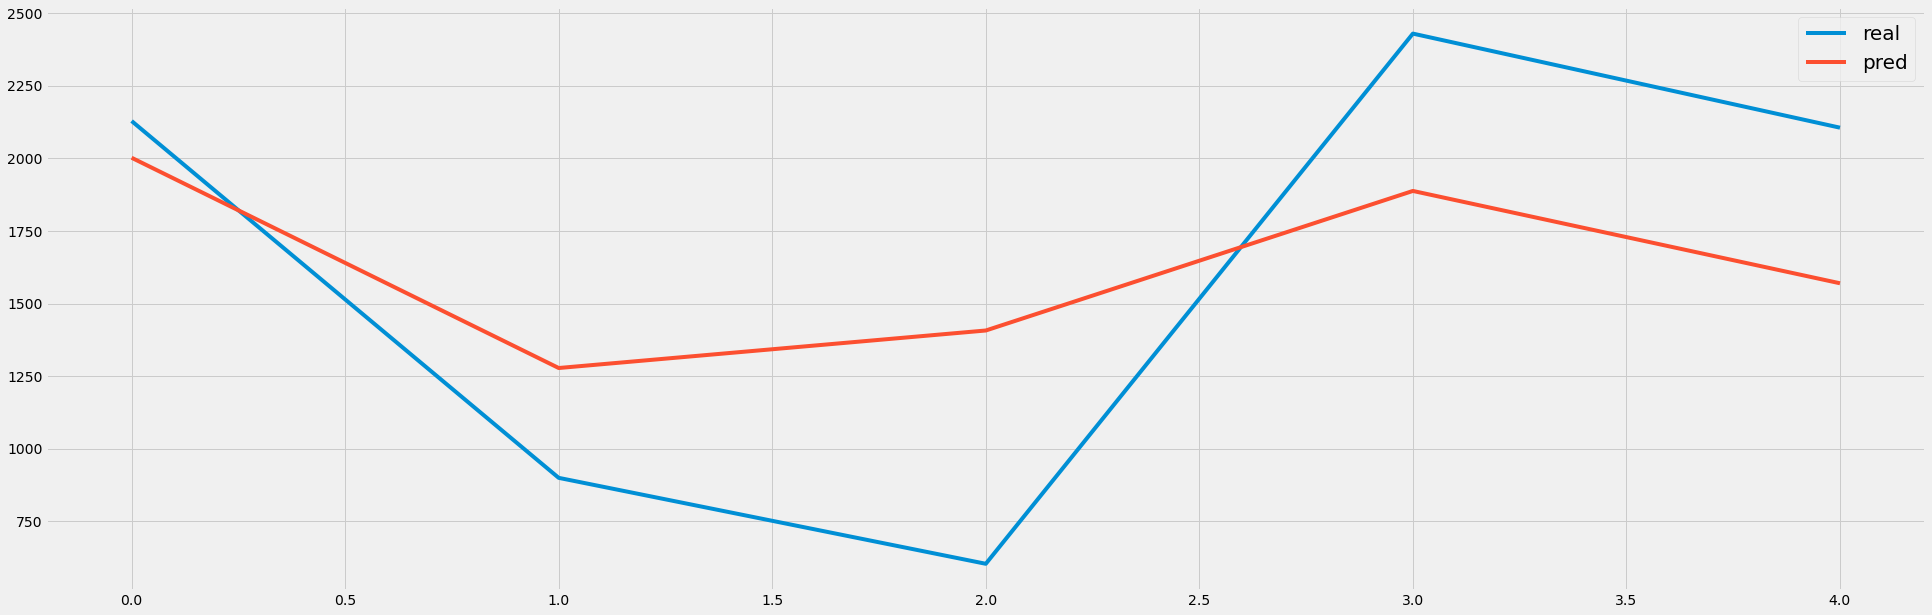

CV 정확도 점수: [-3.91313171e+01 -2.51943896e+04 -1.45316792e+02 -3.64582632e+03
 -3.42132783e+01 -9.98712946e+02 -1.25543153e+05 -3.47744216e+03
 -1.28276522e+01 -3.33645387e+02]
CV 정확도: -15942.466 +/- 37256.859


In [141]:
X_train, X_test, y_train, y_test = data_split(mean_data, feature_names)
forest_fit()

# 합 데이터

In [142]:
sum_data = new_data2.groupby(['발생지_시군구','발생년도']).sum()
sum_data = sum_data.reset_index(drop=False)
sum_data

,발생지_시군구,발생년도,발생시간,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,...,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수,발생월,발생일자,부상자수
0,0,2015,27659,5737,1157,27,389,2788,100,1759,...,85057,6354,15316,3144,78546,2759,2000,13232,31351,3304
1,0,2016,27335,5648,1277,31,450,2664,109,1697,...,82931,6216,14892,3065,76715,2931,1959,13029,31153,3254
2,0,2017,26776,5557,1280,34,447,2567,73,1674,...,83074,6429,14904,3076,78332,2826,1957,12961,31657,3121
3,0,2018,27362,5563,1241,26,439,2698,82,1732,...,86942,6325,14951,3141,80304,2736,1960,13262,31054,3245
4,0,2019,29616,6041,1175,15,392,2973,166,1897,...,93686,6688,16099,3371,86447,2757,2129,14450,33528,3546
5,1,2015,12761,2670,592,10,190,1160,75,717,...,40824,3057,6487,1548,38440,1341,922,6126,14678,1435
6,1,2016,11336,2373,544,10,171,1025,52,605,...,37724,2651,5726,1309,35102,1243,819,5453,12827,1258
7,1,2017,11361,2389,579,15,197,1027,54,612,...,37967,2720,5718,1356,35157,1243,808,5388,13094,1293
8,1,2018,10470,2246,565,11,185,945,44,599,...,36265,2683,5463,1321,34127,1221,769,5100,12260,1185
9,1,2019,12405,2580,509,6,163,1161,46,729,...,43508,3109,6474,1518,40625,1194,900,6106,14480,1376


In [143]:
sum_data.to_csv('광주광역시 교통사고 건수 합 데이터(15~19).csv', encoding='utf-8-sig')

훈련 MSE: 368.311, 테스트 MSE: 7953.882
훈련 R^2: 0.999, 테스트 R^2: 0.985


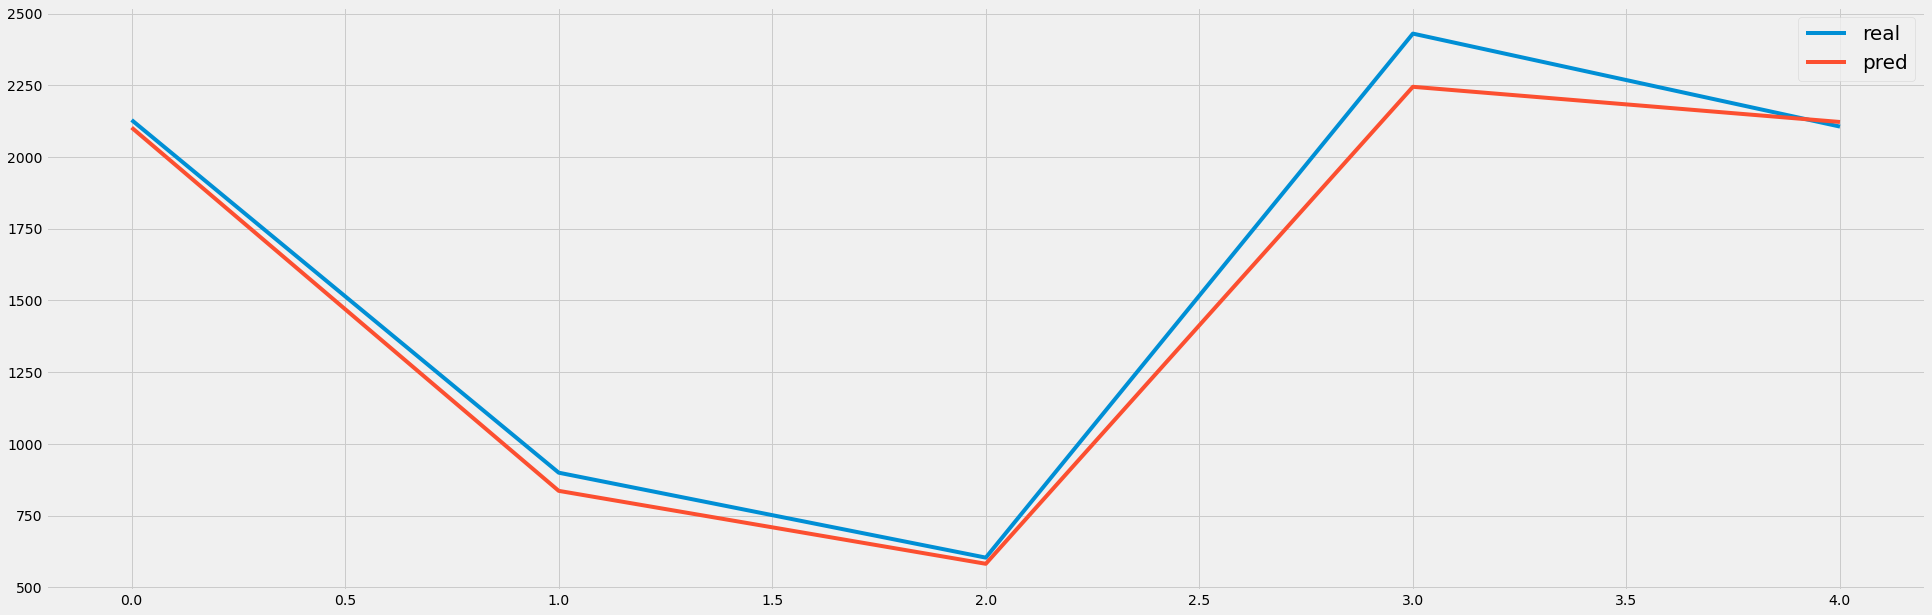

CV 정확도 점수: [ 3.90221059e-01 -2.62924444e+00 -6.62233130e+00 -1.04801926e+01
  1.72827951e-01 -2.78916016e-03 -1.06019347e+01 -1.32965962e+02
  9.17257998e-01 -4.59489250e-01]
CV 정확도: -16.228 +/- 39.142


In [144]:
X_train, X_test, y_train, y_test = data_split(sum_data, feature_names)
forest_fit()

# 요일, 발생년도, 발생월, 발생일자, 발생시간, 발생지 시군구로 그룹화하기

In [145]:
col = ['사고내용', '사망자수', '중상자수', '경상자수','부상신고자수', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태','기상상태',
       '도로형태_대분류', '도로형태', '가해자차종', '가해성별', '가해자연령', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자연령', '피해자신체상해정도',  '사고건수','부상자수']
group_data = new_data2.groupby(['요일', '발생년도','발생월','발생일자','발생시간','발생지_시군구']).sum()[col]
group_data = group_data.reset_index(drop=False)
group_data

,요일,발생년도,발생월,발생일자,발생시간,발생지_시군구,사고내용,사망자수,중상자수,경상자수,...,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수,부상자수
0,0,2015,1,2,1,3,0,0,0,1,...,6,1,55,4,9,2,0,5,1,1
1,0,2015,1,2,8,0,0,0,0,4,...,13,2,92,8,14,2,74,0,2,4
2,0,2015,1,2,9,0,0,0,0,1,...,6,1,42,4,9,2,0,5,1,1
3,0,2015,1,2,9,2,3,0,1,0,...,7,1,52,4,9,2,0,5,1,1
4,0,2015,1,2,10,4,3,0,1,0,...,6,1,34,4,4,1,68,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33776,6,2019,12,31,19,1,0,0,0,2,...,6,2,43,4,7,1,68,0,1,2
33777,6,2019,12,31,20,0,0,0,0,3,...,18,2,90,8,18,2,46,0,2,3
33778,6,2019,12,31,21,0,0,0,0,1,...,6,1,53,4,7,1,68,0,1,1
33779,6,2019,12,31,22,0,1,0,0,0,...,6,1,59,4,4,3,54,2,1,1


훈련 MSE: 0.000, 테스트 MSE: 0.000
훈련 R^2: 1.000, 테스트 R^2: 1.000


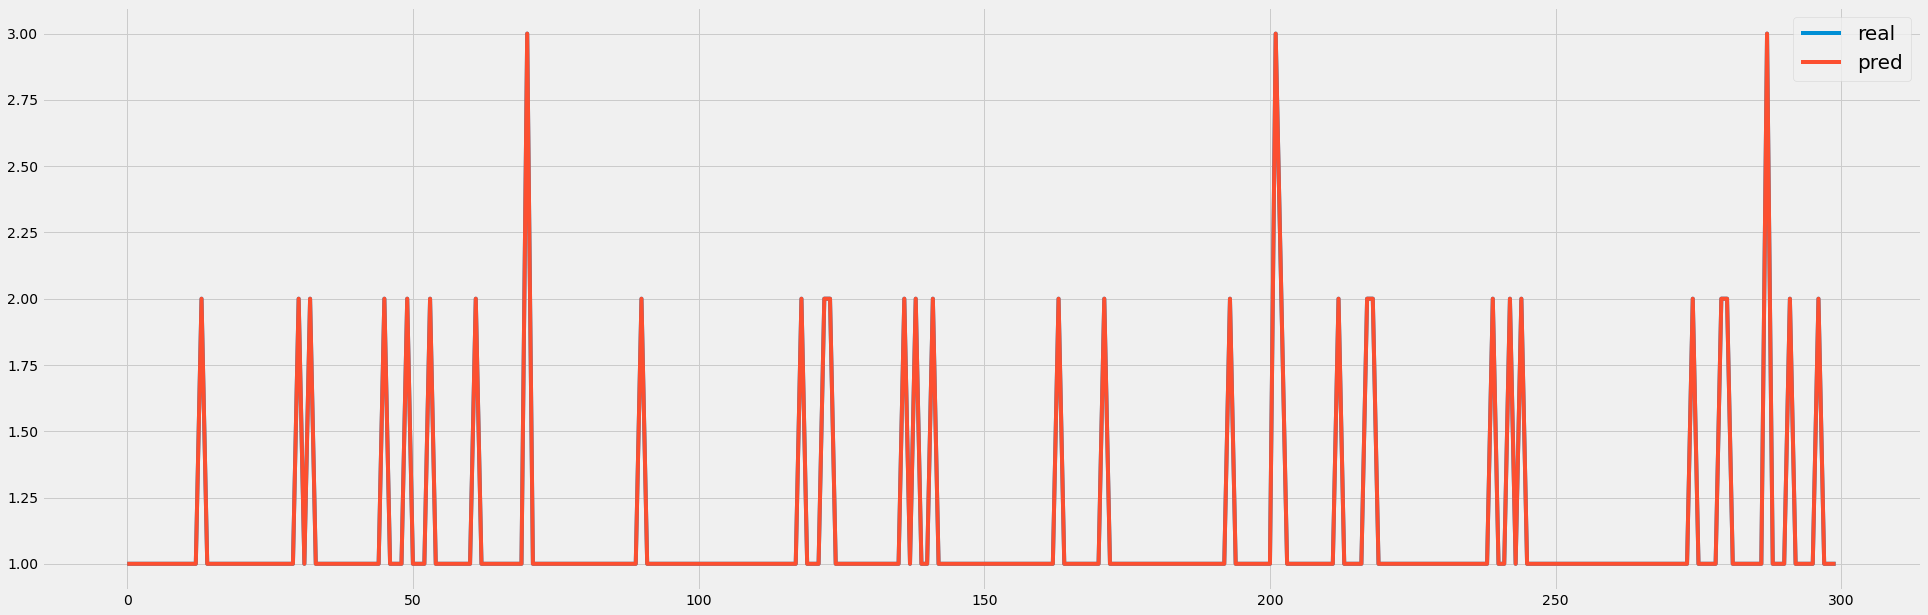

CV 정확도 점수: [0.99998715 0.99771153 0.9799087  0.99969922 0.99559596 1.
 0.99909508 0.99993513 0.99997571 0.99998954]
CV 정확도: 0.997 +/- 0.006


In [146]:
X_train, X_test, y_train, y_test = data_split(group_data, feature_names)
forest_fit()

# 랜덤 포레스트 조합해보기

In [147]:
forest_top5(group_data, feature_names ,2)

KeyError: 'squared_error'